In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.ensemble import  GradientBoostingClassifier


from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from collections import Counter
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score

#from google.colab import files
#from mlxtend.frequent_patterns import apriori, association_rules
#import io
#from mlxtend.preprocessing import TransactionEncoder

In [13]:
data80 = pd.read_csv('C:/Users/Juan/Desktop/UPC/Septimo Ciclo/MachineLearning/TB2/churn-bigml-80.csv')
data20 = pd.read_csv('C:/Users/Juan/Desktop/UPC/Septimo Ciclo/MachineLearning/TB2/churn-bigml-20.csv')
data80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [14]:
dataTotal = data80.append(data20)
dataTotal.describe(include ='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [21]:
# 1a. Presentar la matriz de correlación haciendo uso adecuado de las variables. Comentar los resultados. (2 puntos)
#RPTA:

dataTotal.corr(method = "spearman")

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.017439,0.003077,0.017884,0.032690,0.017884,-0.007954,0.018378,-0.007950,-0.013643,-0.007669,-0.013654,0.014761,0.027453,0.014761,-0.005942,0.015583
Area code,-0.017439,1.000000,0.010228,0.008327,-0.004061,0.008327,0.005023,-0.005238,0.005035,0.008652,0.024707,0.008635,0.003164,-0.005177,0.003164,0.031850,0.003257
Number vmail messages,0.003077,0.010228,1.000000,0.004006,-0.012396,0.004006,0.021162,-0.007148,0.021177,0.005053,0.010975,0.005036,-0.001565,0.006248,-0.001565,-0.019639,-0.095358
Total day minutes,0.017884,0.008327,0.004006,1.000000,0.009391,1.000000,0.006405,0.017867,0.006391,-0.005699,0.023052,-0.005730,-0.016110,-0.000291,-0.016110,-0.015032,0.170677
Total day calls,0.032690,-0.004061,-0.012396,0.009391,1.000000,0.009391,-0.014062,0.013807,-0.014063,0.018890,-0.017848,0.018857,0.015139,0.004148,0.015139,-0.020957,0.026311
Total day charge,0.017884,0.008327,0.004006,1.000000,0.009391,1.000000,0.006405,0.017867,0.006391,-0.005699,0.023052,-0.005730,-0.016110,-0.000291,-0.016110,-0.015032,0.170677
Total eve minutes,-0.007954,0.005023,0.021162,0.006405,-0.014062,0.006405,1.000000,-0.010455,1.000000,-0.013211,0.003399,-0.013220,-0.003225,0.014281,-0.003225,-0.017805,0.088592
Total eve calls,0.018378,-0.005238,-0.007148,0.017867,0.013807,0.017867,-0.010455,1.000000,-0.010446,0.004870,0.005639,0.004892,0.000213,0.014862,0.000213,0.002697,0.008578
Total eve charge,-0.007950,0.005035,0.021177,0.006391,-0.014063,0.006391,1.000000,-0.010446,1.000000,-0.013216,0.003388,-0.013225,-0.003231,0.014289,-0.003231,-0.017800,0.088580
Total night minutes,-0.013643,0.008652,0.005053,-0.005699,0.018890,-0.005699,-0.013211,0.004870,-0.013216,1.000000,0.008580,0.999999,-0.010331,0.000485,-0.010331,-0.012713,0.034343


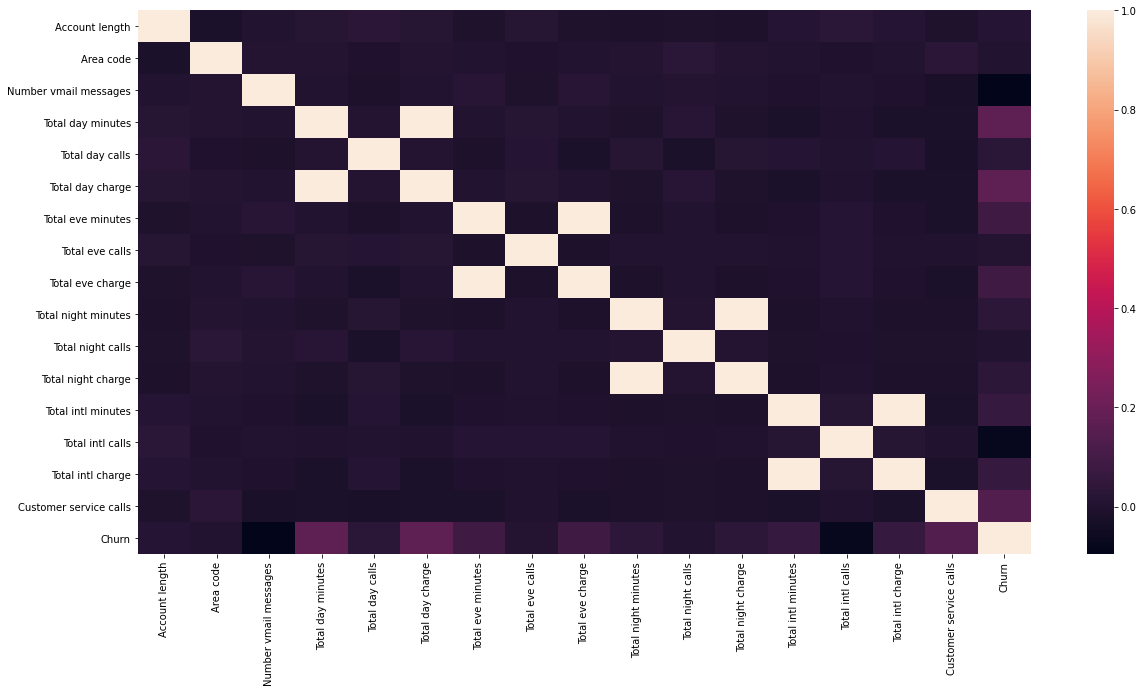

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataTotal.corr(method='spearman'))
plt.show()

In [22]:
# Como se puede observar en el mapa de calor las variales que presentan mayor correlación son las variables de Total minutes y
# Total Charge divididos en cada uno de los plazos de tiempo: day, eve, night y intl. Este resultado es esperado debido a que 
# el total de dinero a pagar esta en función al tiempo utilizado en la llamada.

In [23]:
# ----------------------------------------------------------------------------------------------------------------------

In [24]:
# 1b. Según corresponda, aplicar la prueba de correlación haciendo uso adecuado de las variables.
#     Comentar los resultados. (2 puntos)

ss.spearmanr(dataTotal['Total day minutes'],dataTotal['Total day charge'])

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [25]:
ss.spearmanr(dataTotal['Total eve minutes'],dataTotal['Total eve charge'])

SpearmanrResult(correlation=0.9999997739419472, pvalue=0.0)

In [26]:
ss.spearmanr(dataTotal['Total night minutes'],dataTotal['Total night charge'])

SpearmanrResult(correlation=0.999998791196482, pvalue=0.0)

In [27]:
ss.spearmanr(dataTotal['Total intl minutes'],dataTotal['Total intl charge'])

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

In [28]:
# Luego de aplicar la prueba de correlación a las variables con mayor correlación podemos rechazar la hipotesis nula debido
# a que el Pvalue es menor a 0.05 o 5%

In [29]:
# ----------------------------------------------------------------------------------------------------------------------

In [30]:
# 1c. Aplicar el modelo de clúster mediante el método de k-means haciendo uso adecuado de las variables y presentar
#     una función en la que se muestre una gráfica los anchos de silueta para 2, 3, 4, 5 y 6 segmentos (6 puntos).



In [75]:
X_all = dataTotal.iloc[:,[8,11,14,17]].values
y_all = dataTotal.iloc[:,-1].values

data_X_scale = pd.DataFrame(StandardScaler().fit_transform(X_all))

# 2 Segmentos
kmeans_2 = KMeans(n_clusters=2).fit(data_X_scale)
labels_2 = pd.DataFrame(kmeans_2.predict(data_X_scale))
silhouette_avg_2 = silhouette_score(X_all, labels_2)
silhouette_avg_2

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.13535742410627674

In [76]:
# 3 Segmentos
kmeans_3 = KMeans(n_clusters=3).fit(data_X_scale)
labels_3 = pd.DataFrame(kmeans_3.predict(data_X_scale))
silhouette_avg_3 = silhouette_score(X_all, labels_3)
silhouette_avg_3

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.11338812703555769

In [77]:
# 4 Segmentos
kmeans_4 = KMeans(n_clusters=4).fit(data_X_scale)
labels_4 = pd.DataFrame(kmeans_4.predict(data_X_scale))
silhouette_avg_4 = silhouette_score(X_all, labels_4)
silhouette_avg_4

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.11533429027969375

In [78]:
# 5 Segmentos
kmeans_5 = KMeans(n_clusters=5).fit(data_X_scale)
labels_5 = pd.DataFrame(kmeans_5.predict(data_X_scale))
silhouette_avg_5 = silhouette_score(X_all, labels_5)
silhouette_avg_5

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.06777594376190624

In [79]:
# 6 Segmentos
kmeans_6 = KMeans(n_clusters=6).fit(data_X_scale)
labels_6 = pd.DataFrame(kmeans_6.predict(data_X_scale))
silhouette_avg_6 = silhouette_score(X_all, labels_6)
silhouette_avg_6

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.0999564364544555

In [81]:
!pip install yellowbrick

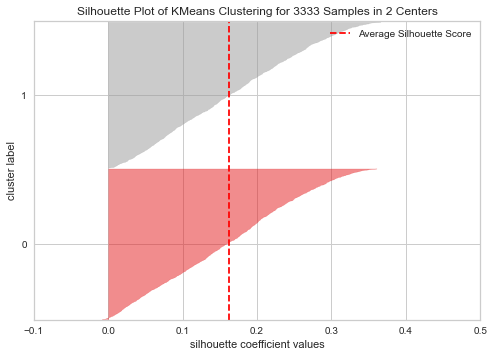

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3333 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [89]:
from yellowbrick.cluster import SilhouetteVisualizer

# 2 Segmentos
model = SilhouetteVisualizer(kmeans_2)
model.fit(data_X_scale)
model.show()

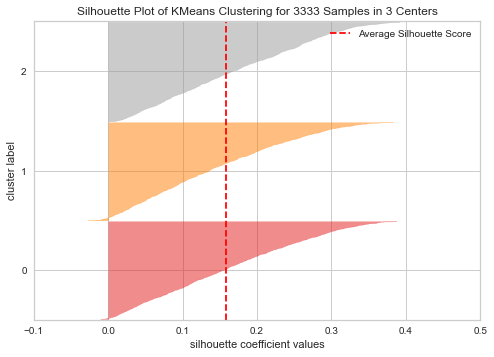

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3333 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [91]:
# 3 Segmentos
model = SilhouetteVisualizer(kmeans_3)
model.fit(data_X_scale)
model.show()

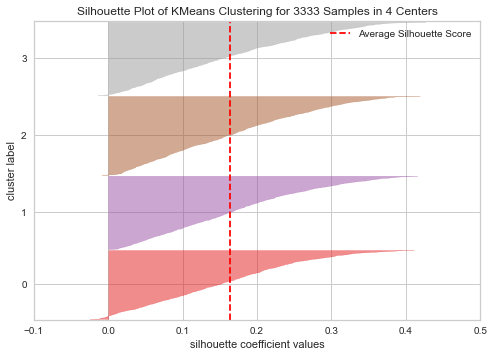

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3333 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [92]:
# 4 Segmentos
model = SilhouetteVisualizer(kmeans_4)
model.fit(data_X_scale)
model.show()

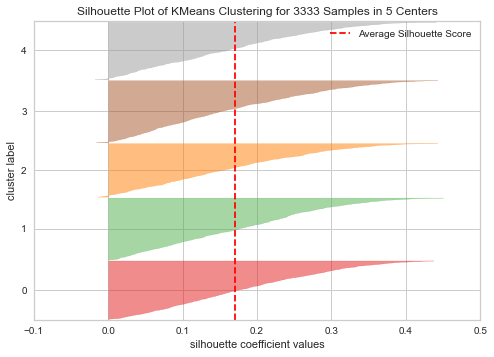

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3333 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [93]:
# 5 Segmentos
model = SilhouetteVisualizer(kmeans_5)
model.fit(data_X_scale)
model.show()

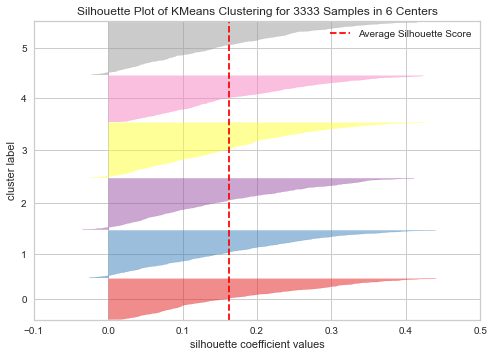

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3333 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [94]:
# 6 Segmentos
model = SilhouetteVisualizer(kmeans_6)
model.fit(data_X_scale)
model.show()

In [96]:
# Luego de analizar los anchos de silueta del problema podemos llegar a la conclusión de que el mejor numero de clusters para
# el ejercicio es 2 con un valor de 0.135 en comparación con el peor cluster el cual tiene el valor de 0.067

# Sin embargo, todos los valores obtenidos son muy cercanos a 0 por lo que entendemos que los grupos cuentan con valores
# en más de un cluster

In [31]:
# ----------------------------------------------------------------------------------------------------------------------

In [37]:
# 2a. Presentar un análisis comparativo de los 3 modelos haciendo uso de las matrices de clasificación y AUC.
#     Presentar sus conclusiones. (5 puntos)

X_train = data80.iloc[:,[8,11,14,17]].values
y_train = data80.iloc[:,-1].values
X_test = data20.iloc[:,[8,11,14,17]].values
y_test = data20.iloc[:,-1].values

X_train[0:5]

array([[45.07, 16.78, 11.01,  2.7 ],
       [27.47, 16.62, 11.45,  3.7 ],
       [41.38, 10.3 ,  7.32,  3.29],
       [50.9 ,  5.26,  8.86,  1.78],
       [28.34, 12.61,  8.41,  2.73]])

In [40]:
# SVN
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   10.7s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [41]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01)


In [45]:
classifier_SVN = SVC(kernel='rbf',C = 100,gamma = 0.1,probability=True).fit(X_train, y_train)
y_pred_SVN = classifier_SVN.predict(X_test)
confusion_matrix(y_test, y_pred_SVN)

array([[527,  45],
       [ 57,  38]], dtype=int64)

Confusion matrix, without normalization
[[527  45]
 [ 57  38]]
Normalized confusion matrix
[[0.92132867 0.07867133]
 [0.6        0.4       ]]


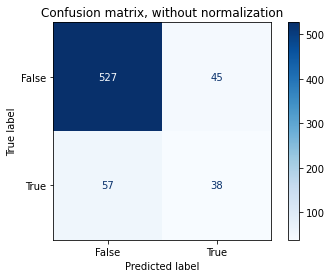

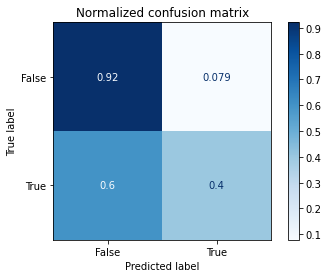

In [46]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [47]:
y_pred_prob_SVN = classifier.predict_proba(X_test)
false_positive_rate_SVN, true_positive_rate_SVN, thresholds = roc_curve(y_test, y_pred_prob_SVN[:,1])
roc_auc_SVN = auc(false_positive_rate_SVN, true_positive_rate_SVN)
roc_auc_SVN

0.7162863452337136

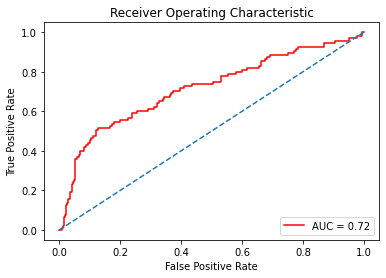

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_SVN,true_positive_rate_SVN, color='red',label = 'AUC = %0.2f' % roc_auc_SVN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
# Random Forest

cv_scores_RF = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)
param_grid_RF = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid = GridSearchCV(RandomForestClassifier(),param_grid_RF,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] .

[CV] . max_depth=3, max_features=log2, n_estimators=700, total=   1.2s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] . max_depth=4, max_features=auto, n_estimators=700, total=   1.3s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] .

[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   1.4s
[CV] max_depth=5, max_features=log2, n_estimators=700 ................
[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   1.4s
[CV] max_depth=5, max_features=log2, n_estimators=700 ................
[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   1.4s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] .

[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   1.7s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   1.7s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   1.7s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   1.7s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   1.7s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.5s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.5s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] .

[CV] . max_depth=9, max_features=log2, n_estimators=200, total=   0.5s
[CV] max_depth=9, max_features=log2, n_estimators=200 ................
[CV] . max_depth=9, max_features=log2, n_estimators=200, total=   0.5s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   1.9s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   1.9s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   1.9s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   1.9s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   1.9s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  4.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=2)

In [53]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=9, n_estimators=700)


Confusion matrix, without normalization
[[555  17]
 [ 58  37]]
Normalized confusion matrix
[[0.97027972 0.02972028]
 [0.61052632 0.38947368]]


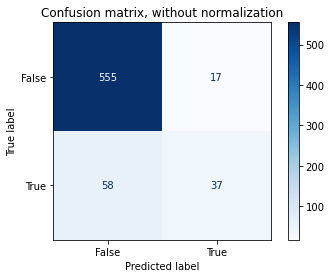

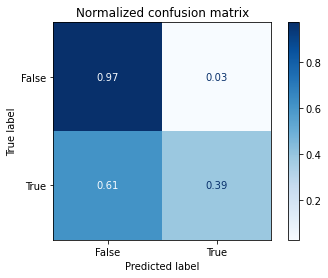

In [56]:
classifier_RF = RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=700).fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)
confusion_matrix(y_test, y_pred_RF)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [57]:
y_pred_prob_RF = classifier_RF.predict_proba(X_test)
false_positive_rate_RF, true_positive_rate_RF, thresholds_RF = roc_curve(y_test, y_pred_prob_RF[:,1])
roc_auc_RF = auc(false_positive_rate_RF, true_positive_rate_RF)
roc_auc_RF

0.7807876334192123

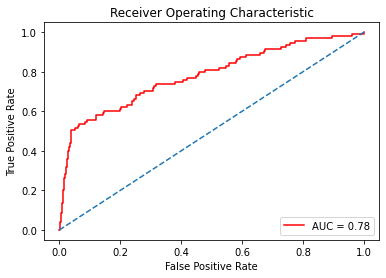

In [59]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_RF,true_positive_rate_RF, color='red',label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
# BOOSTING

cv_scores_BOO = cross_val_score(GradientBoostingClassifier(),X_train,y_train,cv=5)
param_grid_BOO = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5]
}
grid_BOO = GridSearchCV(GradientBoostingClassifier(),param_grid_BOO,refit=True,verbose=2,cv=5)
grid_BOO.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   1.0s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   1.0s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   1.0s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] .

[CV] . max_depth=3, max_features=log2, n_estimators=700, total=   1.0s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.5s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.5s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.5s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.6s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.6s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] . max_depth=4, max_features=auto, n_estimators=700, total=   2.0s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] .

[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   1.6s
[CV] max_depth=5, max_features=log2, n_estimators=700 ................
[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   1.6s
[CV] max_depth=5, max_features=log2, n_estimators=700 ................
[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   1.6s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=2)

In [61]:
print(grid_BOO.best_estimator_)

GradientBoostingClassifier(max_depth=5, max_features='log2', n_estimators=200)


Confusion matrix, without normalization
[[552  20]
 [ 57  38]]
Normalized confusion matrix
[[0.96503497 0.03496503]
 [0.6        0.4       ]]


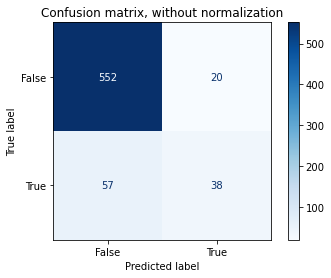

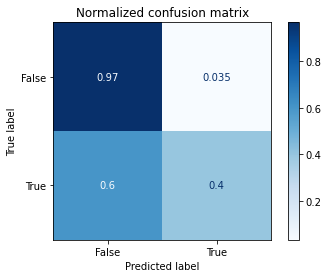

In [62]:
classifier_BOO = GradientBoostingClassifier(max_depth=5, max_features='log2', n_estimators=200).fit(X_train, y_train)
y_pred_BOO = classifier_BOO.predict(X_test)
confusion_matrix(y_test, y_pred_BOO)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier_BOO, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [64]:
y_pred_prob_BOO = classifier_BOO.predict_proba(X_test)
false_positive_rate_BOO, true_positive_rate_BOO, thresholds_BOO = roc_curve(y_test, y_pred_prob_BOO[:,1])
roc_auc_BOO = auc(false_positive_rate_BOO, true_positive_rate_BOO)
roc_auc_BOO

0.7523003312476997

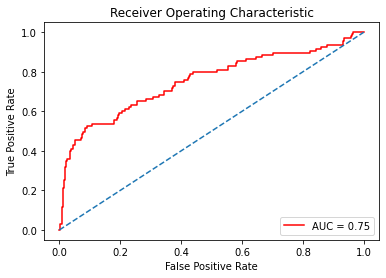

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_BOO,true_positive_rate_BOO, color='red',label = 'AUC = %0.2f' % roc_auc_BOO)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# RPTA:

#      Entre los tres modelos el random forest y boosting obtienen el mejor desempeño, esto puede deberse al metodo que se
#      utiliza para la predicción. Finalmente el modelo de Random Forest obtiene un mejor AUC de 0.78

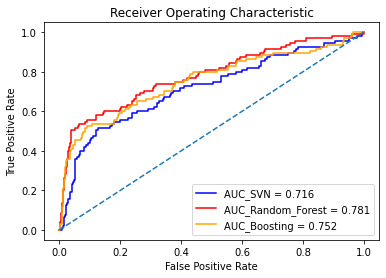

In [71]:
# 2b. Programar una función para presentar en una sola gráfica la curva ROC (Receiver Operating Characteristic)
#     haciendo uso de los modelos de Machine Learning SVM, Random Forest y Boosting. Presentar sus conclusiones. (5 puntos)

plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate_SVN,true_positive_rate_SVN, color='blue',label = 'AUC_SVN = %0.3f' % roc_auc_SVN)

plt.plot(false_positive_rate_RF,true_positive_rate_RF, color='red',label = 'AUC_Random_Forest = %0.3f' % roc_auc_RF)

plt.plot(false_positive_rate_BOO,true_positive_rate_BOO, color='orange',label = 'AUC_Boosting = %0.3f' % roc_auc_BOO)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

In [95]:
# RPTA:
#      Entre las tres curvas ROC podemos observar que el Random Forest se encuentra por encima del resto debido a que cuenta 
#      con un AUC de 0.781